In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_excel("data_lab3.xlsx", sheet_name = 0)
df

,Внутричерепное давление,t36,t35,t34,t33,t32
0,1,37,35,33,28,26
1,2,38,33,30,28,25
2,3,33,34,30,31,29
3,4,45,30,27,28,19
4,5,36,31,29,27,25
5,6,44,40,37,33,28
6,7,35,33,28,27,25
7,8,34,29,28,26,24
8,9,39,34,31,29,24
9,10,38,36,33,29,25


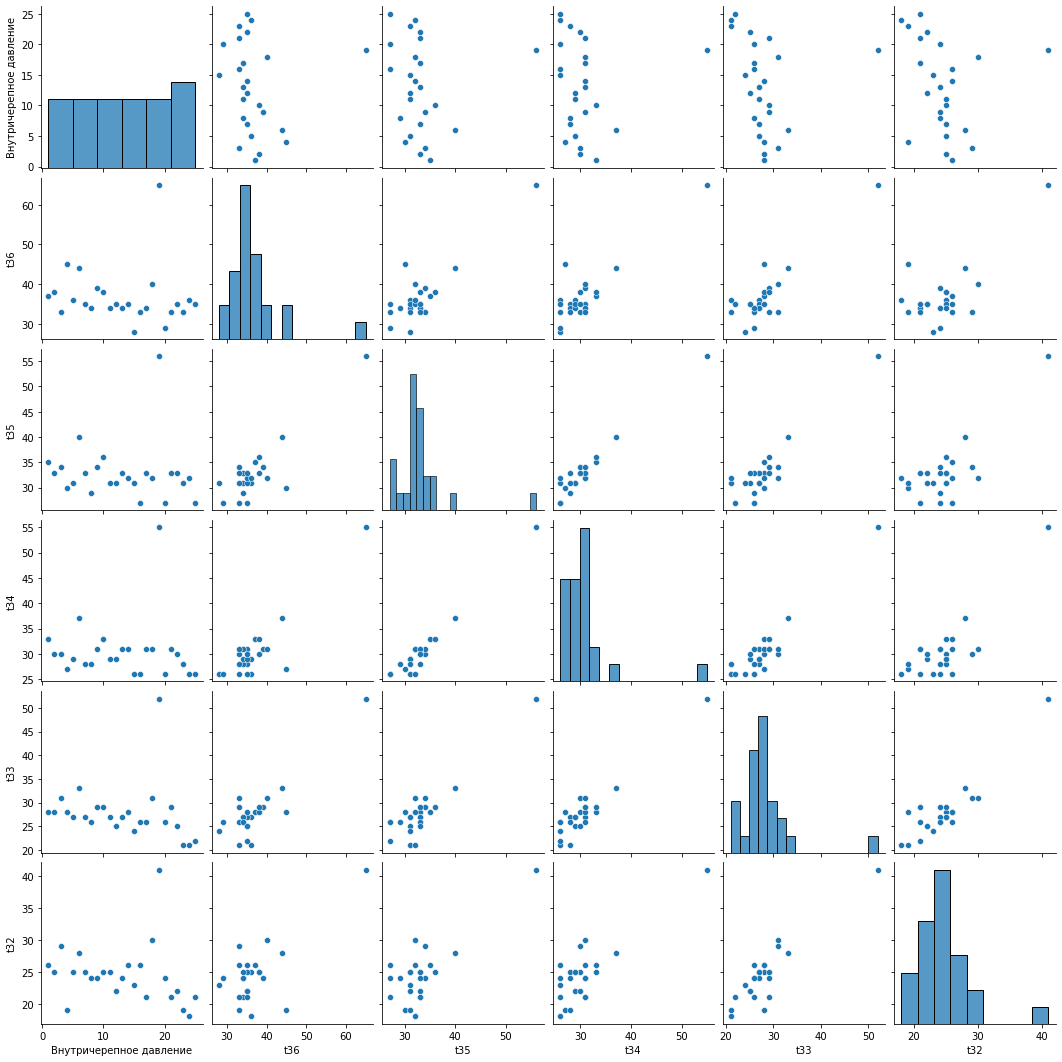

In [77]:
# 1. Побудувати матрицю діаграм розсіювання. 
# З вигляду одержаних діаграм розсіювання визначити, чи виділяються в просторі різних пар ознак кластери і яка кількість. 

sb.pairplot(df)

<AxesSubplot:>

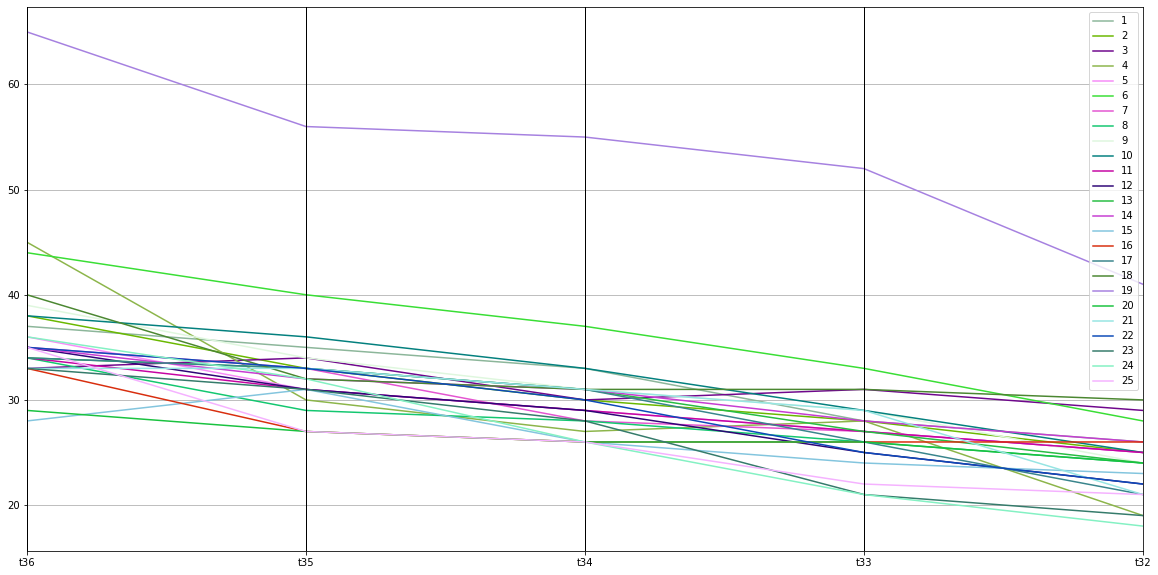

In [79]:
# 2. Побудувати графік, на якому кожному пацієнту має відповідати окрема крива, що показує зміну показника в залежності від температури тіла 
# (у варіантах 1–10) або часу (у варіантах 11–16). Назвемо це графіком паралельних координат. 
# З його вигляду необхідно зробити висновок про те, однорідні дані чи виділяється декілька кластерів? яка кількість кластерів? 

plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df, class_column="Внутричерепное давление")

In [145]:
# 3. Розбити пацієнтів на кластери за допомогою різних ієрархічних алгоритмів кластеризації. 
# Результати роботи кожного з них подати у вигляді дендрограми. За виглядом дендрограм оцінити оптимальну кількість кластерів. 
# Проаналізувати розбиття на оптимальну кількість кластерів різними алгоритмами та обрати найкраще з фізичної точки зору. 
# З метою надання фізичної інтерпретації одержаним розбиттям на графіку паралельних координат помітити криві пацієнтів з різних кластерів різними кольорами.

from sklearn.cluster import AgglomerativeClustering

In [172]:
agglomerative = AgglomerativeClustering()
agglomerative.fit(df)
labels = agglomerative.labels_

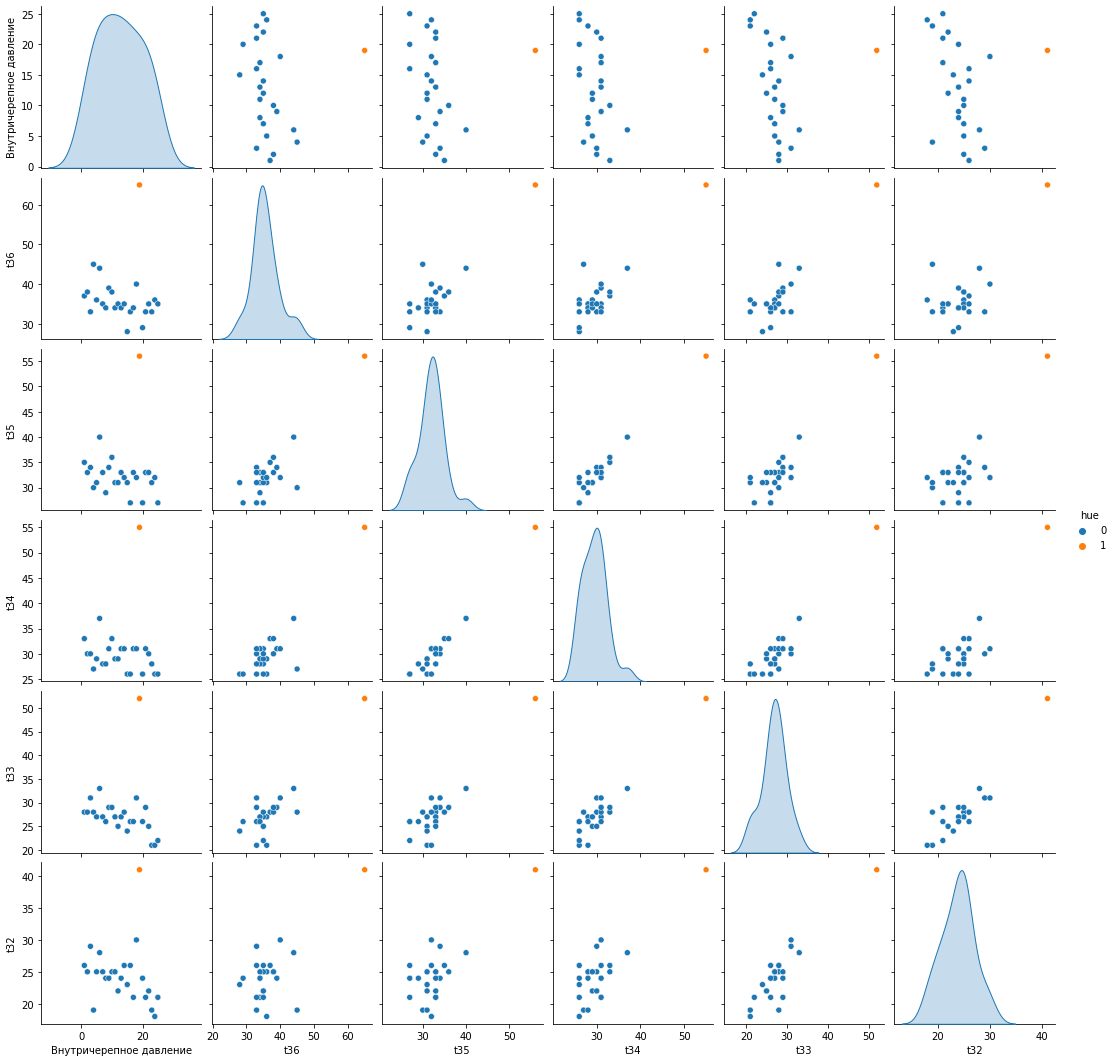

In [173]:
sb.pairplot(df.assign(hue=agglomerative.labels_), hue='hue')

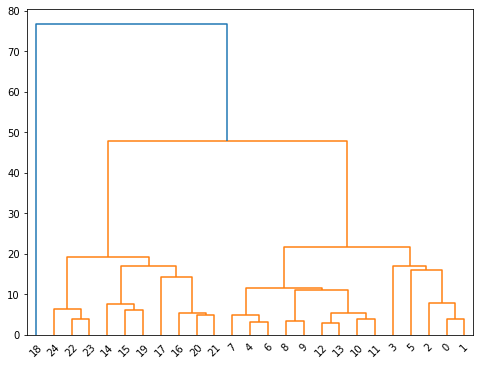

In [148]:
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(df, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

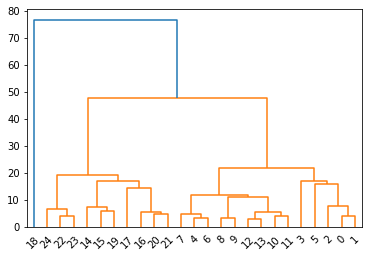

In [150]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plot_dendrogram(model, truncate_mode="level")
plt.show()

In [208]:
# 4. Розбити пацієнтів на кластери за допомогою алгоритму k-середніх. 
# В процесі кластеризації проекспериментувати із запуском алгоритму k-середніх за різних варіантів ініціалізації та різної кількості кластерів. 
# Які значення параметрів алгоритму є кращими? У цьому пункті результати кластеризації також доцільно візуалізувати на графіку паралельних координат,
# де лінії, що відповідають пацієнтам з різних кластерів, помічені різними кольорами. 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)

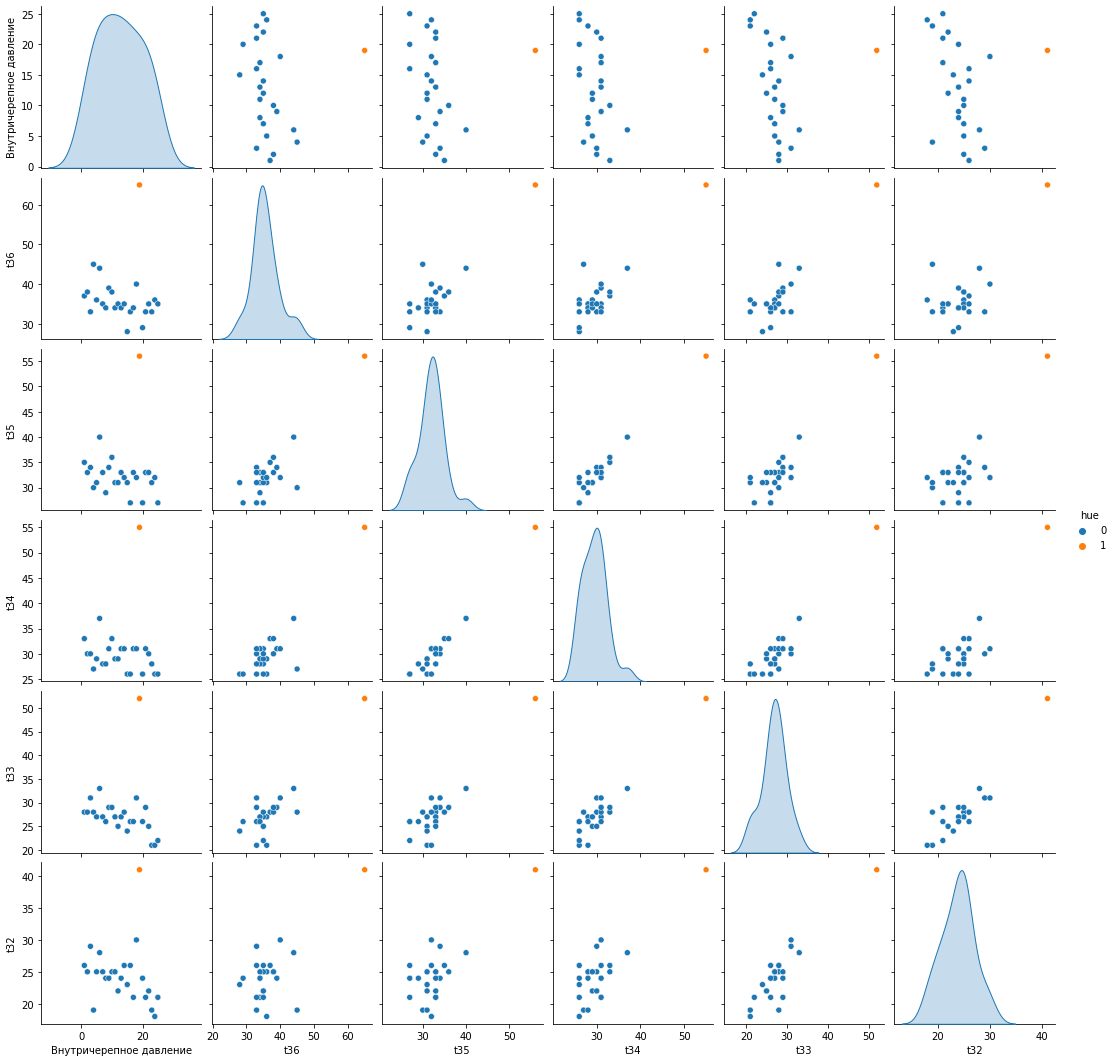

In [209]:
sb.pairplot(df.assign(hue=kmeans.labels_), hue='hue')

In [190]:
# calinski_harabasz_score

from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=2)
calinski_harabasz_score(df, kmeans.fit_predict(df))

28.311027241968688

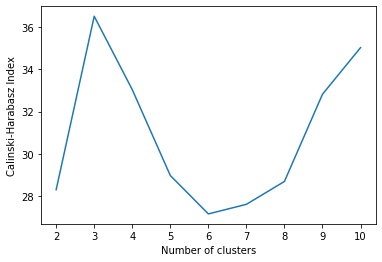

In [193]:
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    ch_index = calinski_harabasz_score(df, labels)
    results.update({i: ch_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [205]:
# davies_bouldin_score

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df, KMeans(n_clusters=2).fit_predict(df))

0.1642326377744773

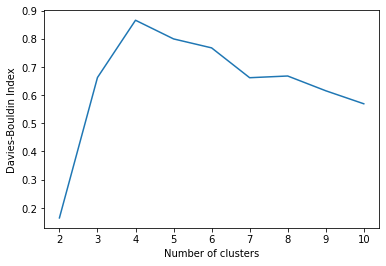

In [194]:
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    db_index = davies_bouldin_score(df, labels)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

In [204]:
# silhouette_score

from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2)
silhouette_score(df, KMeans(n_clusters=2).fit_predict(df))

0.7308775763503147

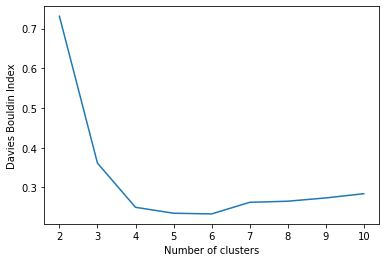

In [195]:
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    s_index = silhouette_score(df, labels)
    results.update({i: s_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin Index")
plt.show()

In [200]:
# adjusted_rand_score

from sklearn.metrics.cluster import adjusted_rand_score

kmeans = KMeans(n_clusters=2).fit(df)
adjusted_rand_score(kmeans.labels_, agglomerative.labels_)

1.0